In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [57]:
sns.set(font_scale = 1.5, rc = {'figure.figsize':(10,6)})
sns.set_style("whitegrid")

In [58]:
data = pd.read_csv("loan_data.csv")

# Original data

In [59]:
data.shape

(10000, 29)

In [60]:
data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
0,571203,18000,18000,60 months,10.16,383.87,10+ years,MORTGAGE,72804.0,Current,...,13263.18,7273.77,4736.82,2536.95,NaN,NaN,10.16%,NaN,NaN,10.16
1,694891,15675,15675,36 months,8.90,497.74,10+ years,MORTGAGE,100000.0,Current,...,15294.25,496.78,380.75,116.03,NaN,NaN,8.90%,NaN,NaN,8.90
2,784712,16500,16500,60 months,7.90,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,12966.64,5000.85,3533.36,1467.49,NaN,NaN,7.90%,NaN,NaN,7.90
3,843448,5500,5500,36 months,13.67,187.10,3 years,RENT,55000.0,Fully Paid,...,0.00,5792.14,5500.00,292.14,NaN,NaN,13.67%,NaN,NaN,13.67
4,974654,6400,6400,36 months,15.80,224.38,2 years,RENT,34000.0,Current,...,4430.59,2912.26,1969.41,942.85,NaN,NaN,15.80%,NaN,NaN,15.80


In [61]:
# Take a look at the target variable, majority are current loan and few are showing NaN
data['loan_status'].value_counts(dropna=False)

Current               8122
Fully Paid             951
NaN                    476
Charged Off            218
Late (31-120 days)     148
In Grace Period         48
Late (16-30 days)       21
Default                 16
Name: loan_status, dtype: int64

In [62]:
# take a look at the all the column
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'wtd_loans', 'interest_rate', 'int_rate2', 'num_rate', 'numrate',
       'int_rate3'],
      dtype='object')

In [63]:
# the status show NaN seems to be just applied
data.loc[pd.isna(data['loan_status'])]

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
8096,5967209,14000,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8097,6264816,4000,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8098,6287749,3000,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,6296396,2400,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8100,6296846,6000,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10105778,10000,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,10109949,15000,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,10112187,3500,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,10119897,10000,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# looking at the columns that don't have description: redundant or uninformative
data[['wtd_loans', 'interest_rate', 'int_rate2', 'num_rate', 'numrate',
       'int_rate3']].describe()

,wtd_loans,interest_rate,num_rate,numrate,int_rate3
count,0.0,0.0,0.0,0.0,9524.000000
mean,NaN,NaN,NaN,NaN,14.277852
std,NaN,NaN,NaN,NaN,4.430159
min,NaN,NaN,NaN,NaN,6.030000
25%,NaN,NaN,NaN,NaN,11.140000
50%,NaN,NaN,NaN,NaN,14.090000
75%,NaN,NaN,NaN,NaN,17.270000
max,NaN,NaN,NaN,NaN,26.060000


# First preprocessing - shrink dataset

In [65]:
def first_processing(data):
    # Get rid of the NaN(just applied) and Current(which we don't have result)
    temp = data.loc[(np.invert(pd.isna(data['loan_status']))) & (data['loan_status']!='Current')]
    
    # Drop the column that are redundant or uninformative
    final = temp.drop(['id','wtd_loans', 'interest_rate', 'int_rate2', 'num_rate', 'numrate', 'int_rate3'], axis = 1)
    
    # Categorize the 'Fully Paid' and 'In Grace Period' to be good loan
    final['good_loan'] = np.where((final['loan_status']=='Fully Paid')|(final['loan_status']=='In Grace Period'), 
                                  'good', 
                                  'bad')
    final = final.drop(['loan_status'], axis = 1)
    return final

In [66]:
loan = first_processing(data)

In [67]:
# No Duplicate
loan.duplicated().sum()

0

<AxesSubplot:xlabel='count', ylabel='good_loan'>

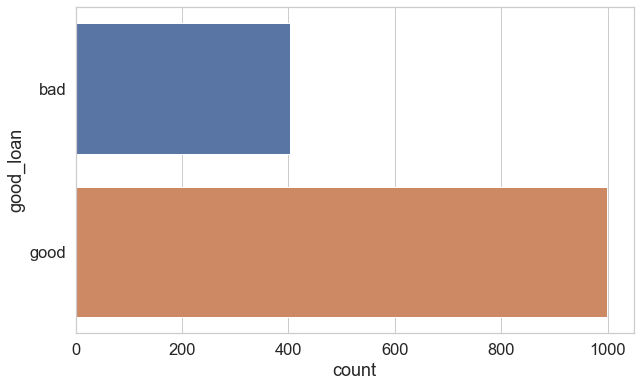

In [68]:
# Moderately imbalanced
sns.countplot(y = 'good_loan', data = loan)

# Train test split

In [69]:
# Split data before any manipulation, so that there's no information leakage from test set

train, test = train_test_split(loan, test_size = 0.2, random_state = 2022)
train=train.copy()
test=test.copy()

# EDA

In [70]:
train.shape

(1121, 22)

In [71]:
train.isnull().sum(axis = 0)

loan_amnt                   0
funded_amnt                 0
term                        0
int_rate                    0
installment                 0
emp_length                 43
home_ownership              0
annual_inc                  0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
mths_since_last_delinq    668
open_acc                    0
revol_bal                   0
total_acc                   0
out_prncp                   0
total_pymnt                 0
total_rec_prncp             0
total_rec_int               0
good_loan                   0
dtype: int64

In [72]:
# Categorical variable summary
train.describe(include=[object])

,term,emp_length,home_ownership,purpose,addr_state,earliest_cr_line,good_loan
count,1121,1078,1121,1121,1121,1121,1121
unique,2,11,3,13,44,1121,2
top,36 months,10+ years,MORTGAGE,debt_consolidation,CA,1994-03-08 12:00:00,good
freq,860,352,529,670,194,1,805


In [73]:
# Numerical variable summary
train.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,453.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,13728.033006,13720.851918,14.517172,426.014924,70122.126646,16.641775,0.238180,34.752759,10.472792,14566.883140,24.413916,2009.923533,11284.636557,9941.688341,1318.615201
std,8089.709054,8086.522943,4.605891,238.011637,49204.559561,7.894319,0.690112,21.858774,4.236472,12227.899566,11.007057,5533.308066,9045.575659,8503.718908,1451.360174
min,1000.000000,1000.000000,6.030000,31.170000,8400.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000,156.080000,77.960000,13.040000
25%,7200.000000,7200.000000,11.140000,243.730000,43680.000000,10.630000,0.000000,16.000000,7.000000,6768.000000,17.000000,0.000000,4214.400000,2800.000000,370.080000
50%,12000.000000,12000.000000,14.300000,393.670000,60000.000000,16.370000,0.000000,31.000000,10.000000,11837.000000,23.000000,0.000000,8923.510000,7800.000000,846.980000
75%,18500.000000,18400.000000,17.770000,562.510000,83100.000000,22.260000,0.000000,51.000000,13.000000,19248.000000,31.000000,0.000000,16467.620000,15000.000000,1716.990000
max,35000.000000,35000.000000,26.060000,1366.360000,760000.000000,34.960000,8.000000,83.000000,27.000000,112055.000000,63.000000,34113.820000,44231.080000,35000.010000,10804.930000


In [74]:
numeric_col = train.select_dtypes(exclude=["object","category"]).columns
cate_col = train.select_dtypes(exclude=["int64","float64"]).columns

### Numeric variable plot

In [75]:
def numeric_plot(col_name):
    for col in col_name:
        plt.figure()
        sns.violinplot(data = train, 
                       x = col, 
                       y = 'good_loan', 
                       palette = 'GnBu',inner = 'box', saturation = 3)
#         plt.axvline(np.median(train.loc[loan['good_loan']=='good',col]), c = 'steelblue', ymax = 0.5)
#         plt.axvline(np.median(train.loc[loan['good_loan']=='bad',col]), c = 'green', ymin = 0.5)

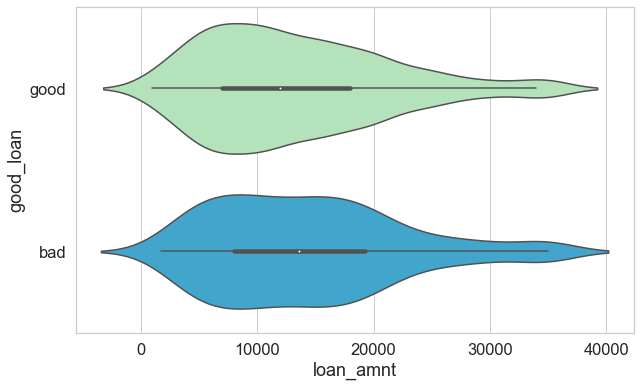

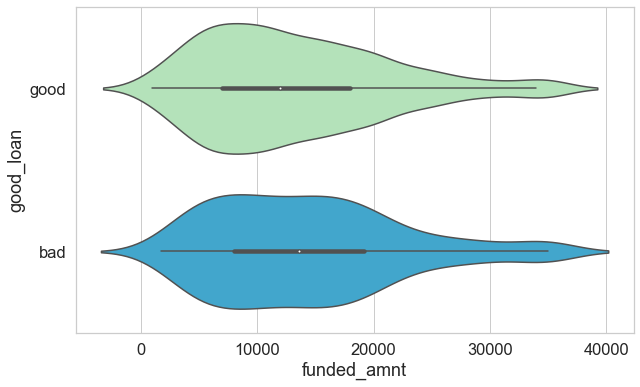

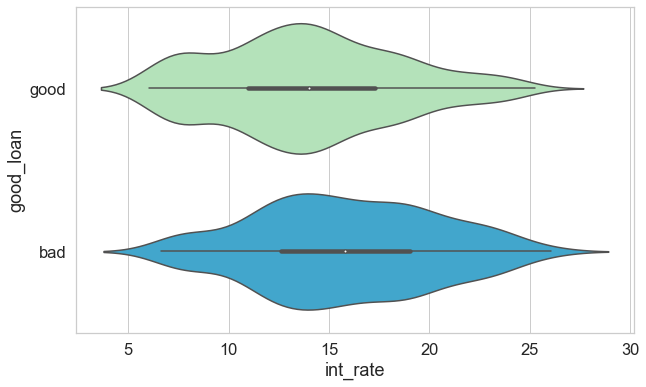

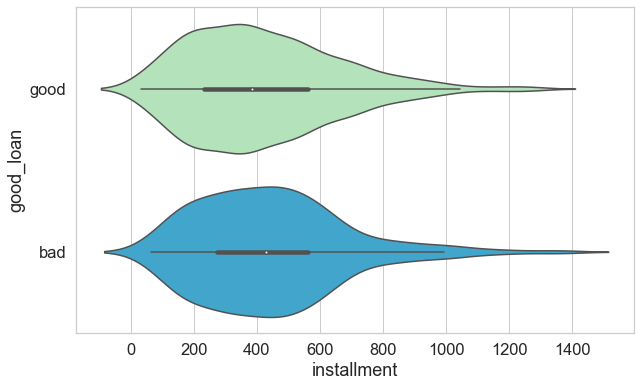

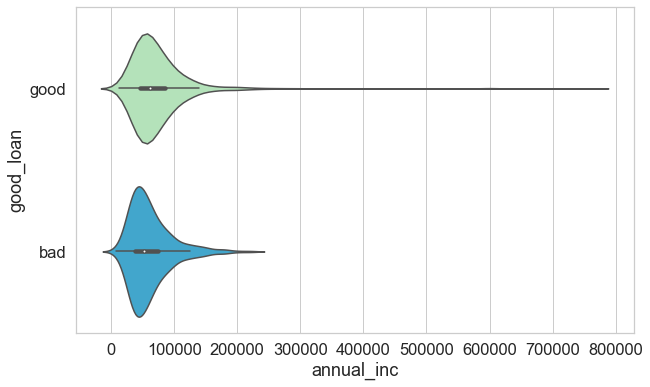

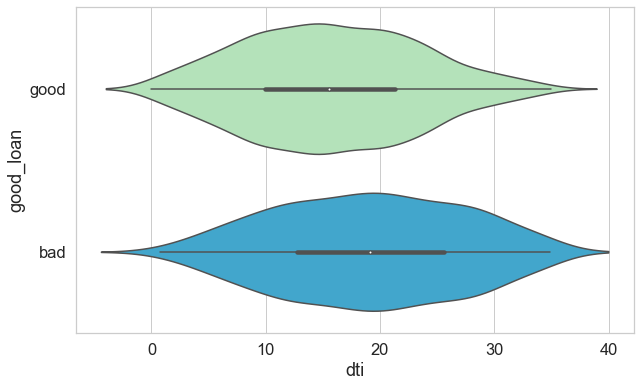

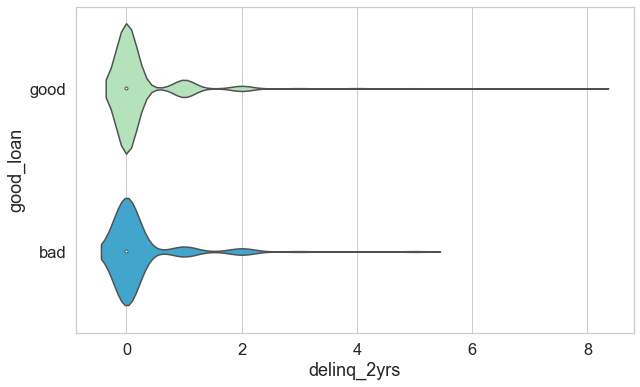

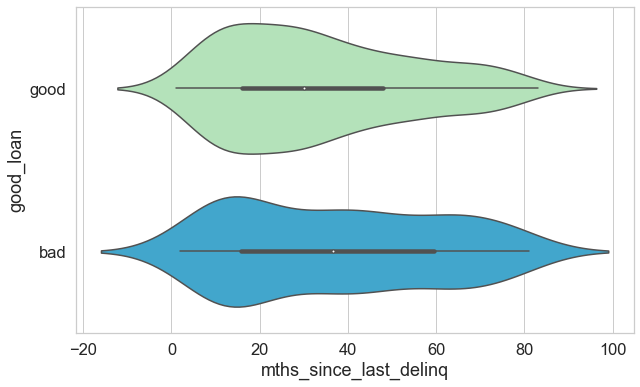

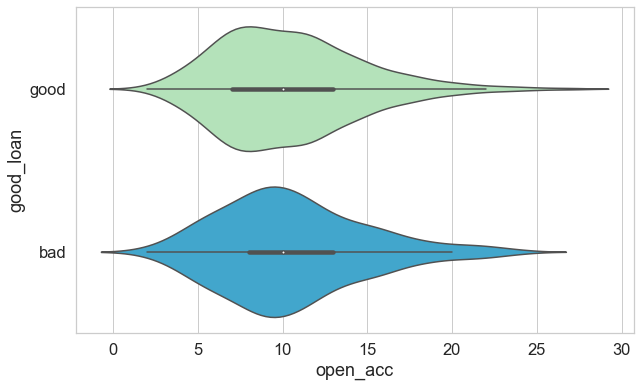

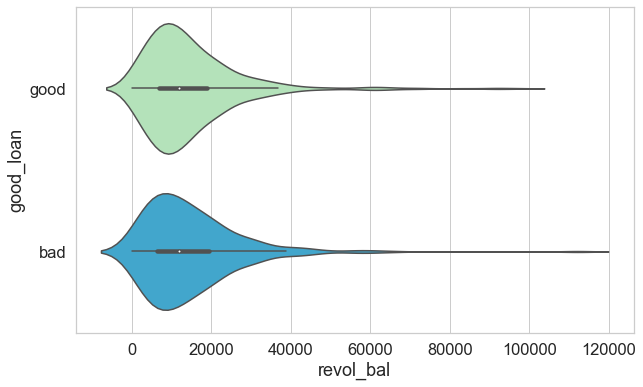

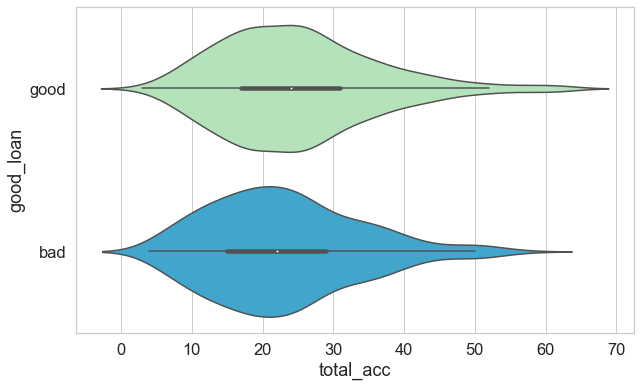

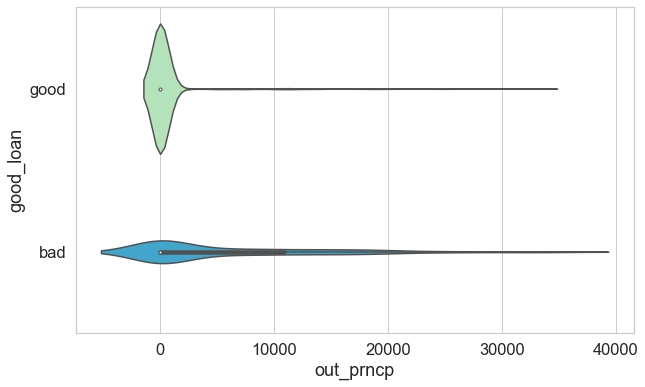

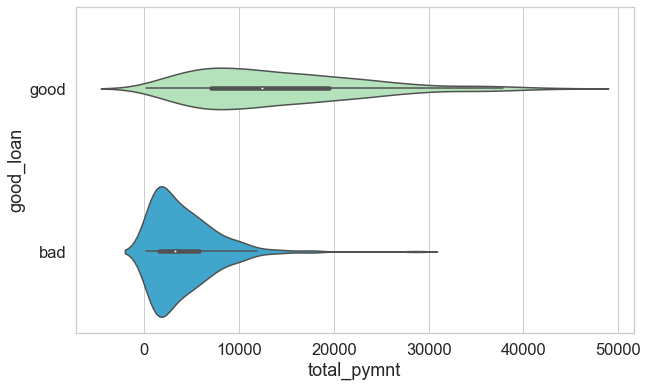

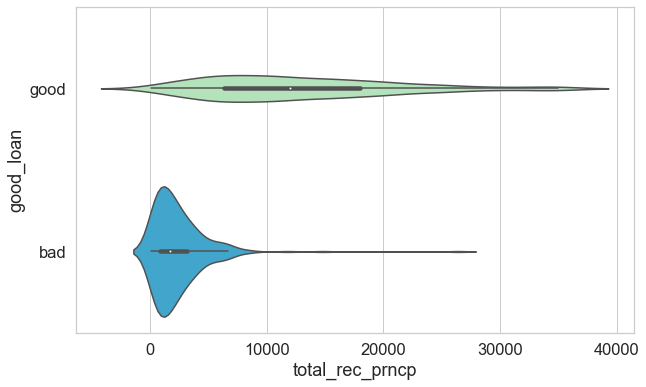

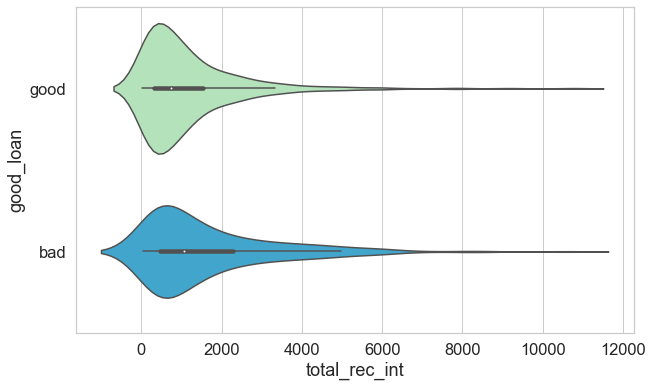

In [76]:
numeric_plot(numeric_col)

### Categorical plot

In [77]:
cate_col

Index(['term', 'emp_length', 'home_ownership', 'purpose', 'addr_state',
       'earliest_cr_line', 'good_loan'],
      dtype='object')

In [78]:
def cate_plot(colname):
    for col in colname:
        
        print(train.groupby([col])['good_loan'].apply(pd.value_counts,normalize=True,dropna=False))
        
        plt.figure()
        sns.countplot(x = col, 
                      hue = 'good_loan', 
                      data = train.sort_values(by=col), 
                      palette = "BuPu", hue_order = ['good', 'bad'])
        plt.xticks(rotation = 45)
        


term            
 36 months  good    0.748837
            bad     0.251163
 60 months  good    0.616858
            bad     0.383142
Name: good_loan, dtype: float64
emp_length      
1 year      good    0.723684
            bad     0.276316
10+ years   good    0.744318
            bad     0.255682
2 years     good    0.700000
            bad     0.300000
3 years     good    0.782051
            bad     0.217949
4 years     good    0.707692
            bad     0.292308
5 years     good    0.726316
            bad     0.273684
6 years     good    0.682927
            bad     0.317073
7 years     good    0.728814
            bad     0.271186
8 years     good    0.591837
            bad     0.408163
9 years     good    0.714286
            bad     0.285714
< 1 year    good    0.701299
            bad     0.298701
Name: good_loan, dtype: float64
home_ownership      
MORTGAGE        good    0.746692
                bad     0.253308
OWN             good    0.724771
                bad     0.27

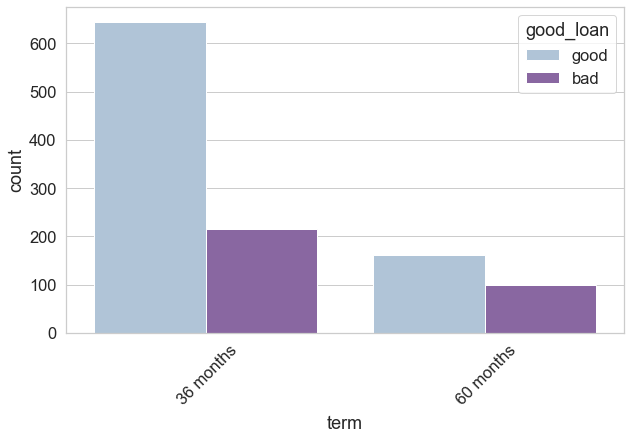

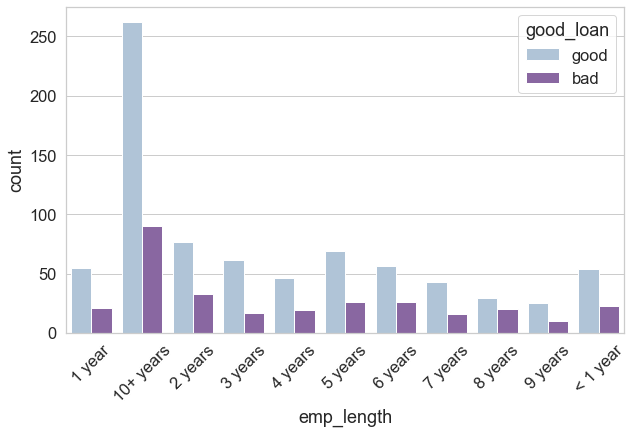

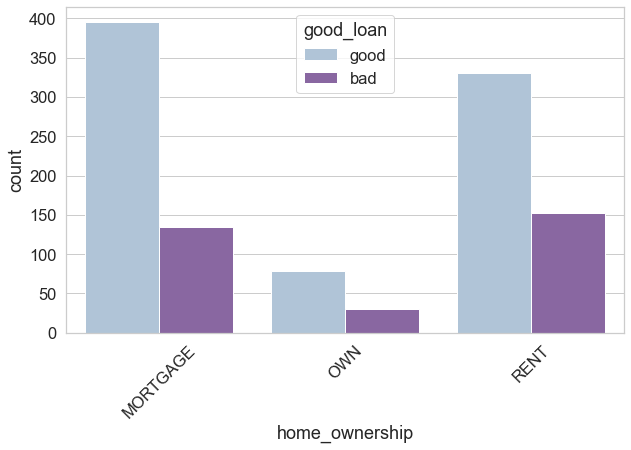

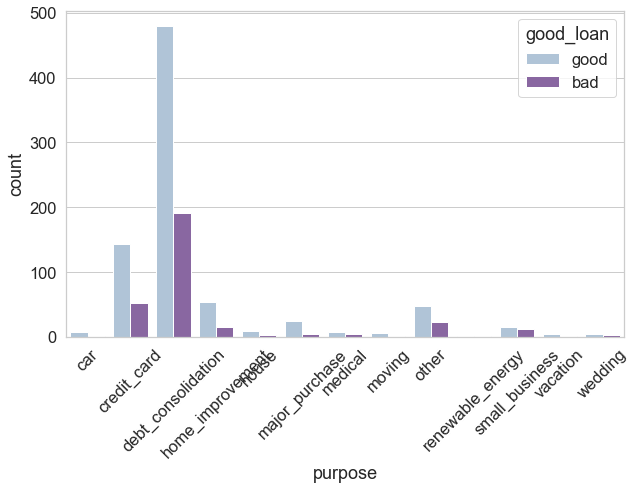

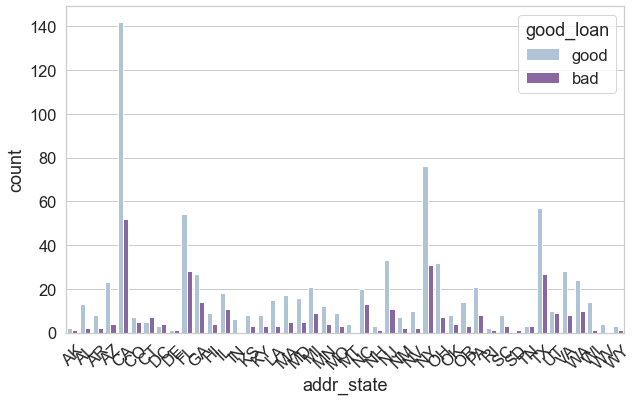

In [79]:
cate_plot(cate_col[:5])

### Check for Collinearity

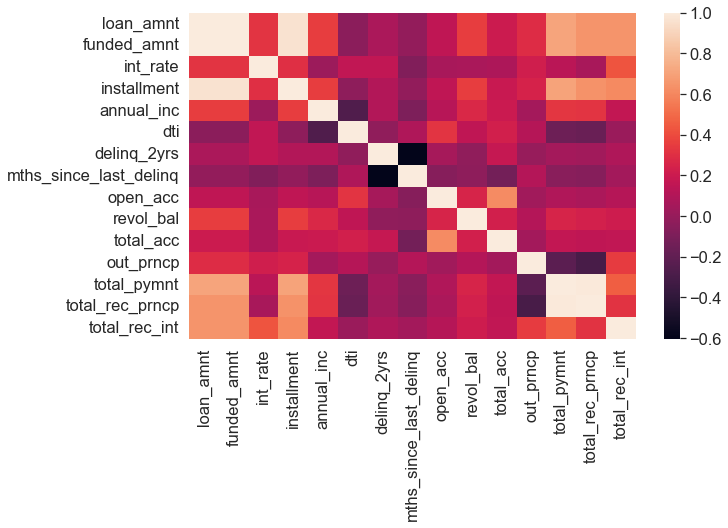

In [80]:
corr_matrix = train.corr()
# plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix)
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='funded_amnt'>

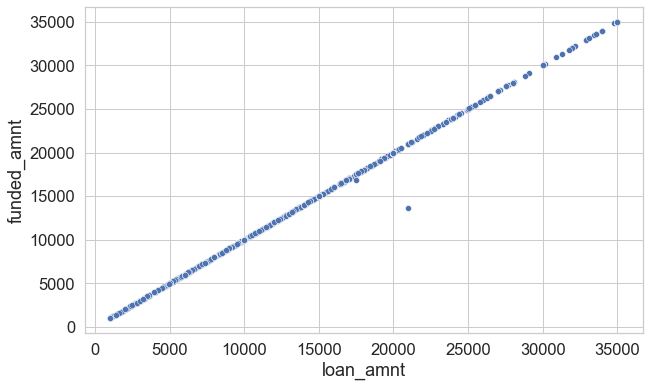

In [81]:
sns.scatterplot(x = 'loan_amnt', y = 'funded_amnt', data = train)

In [82]:
# The only two times not granted requested amount end up being Charged Off
data[data['loan_amnt']!=data['funded_amnt']]

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
9,1063649,17500,16800,60 months,22.74,471.10,6 years,MORTGAGE,95000.0,Charged Off,...,0.00,4704.90,1662.30,3042.60,NaN,NaN,22.74%,NaN,NaN,22.74
40,1058291,12000,7775,60 months,15.27,186.08,7 years,RENT,50000.0,Current,...,5125.40,4808.96,2649.60,2159.36,NaN,NaN,15.27%,NaN,NaN,15.27
683,1365626,26500,18000,36 months,8.90,571.56,2 years,MORTGAGE,175000.0,Current,...,8598.28,11424.93,9401.72,2023.21,NaN,NaN,8.90%,NaN,NaN,8.90
3814,1367216,21000,13650,60 months,21.48,372.98,10+ years,MORTGAGE,85000.0,Charged Off,...,0.00,5214.44,2023.52,3190.92,NaN,NaN,21.48%,NaN,NaN,21.48


<AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_prncp'>

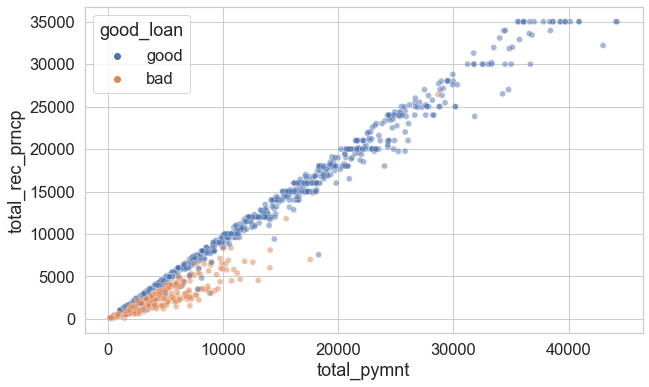

In [83]:
# total payment = total_rec_int + total_rec_prncp
sns.scatterplot(x = 'total_pymnt', 
                y = 'total_rec_prncp', 
                data = train, 
                hue = 'good_loan', 
                alpha = 0.5)

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

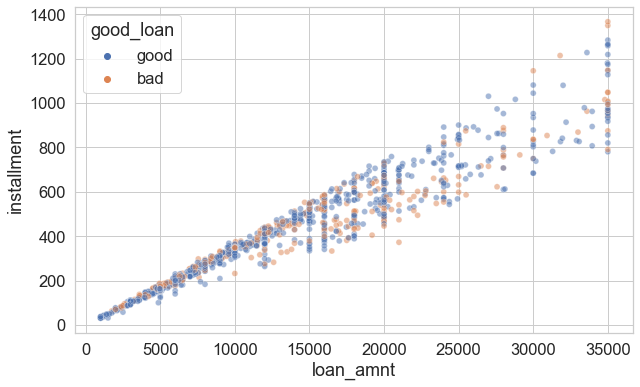

In [84]:
sns.scatterplot(y = 'installment', x = 'loan_amnt', data = train, hue = 'good_loan', alpha = 0.5)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='mths_since_last_delinq'>

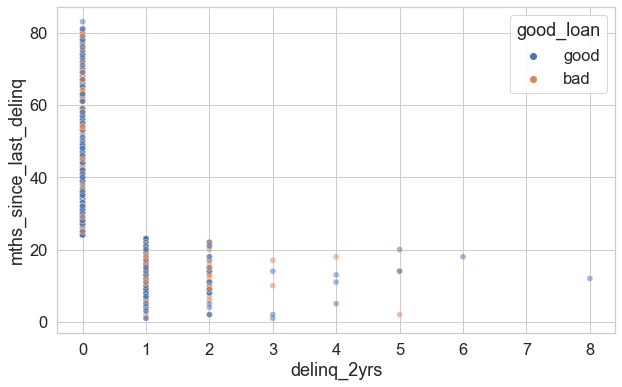

In [85]:
sns.scatterplot(x = 'delinq_2yrs', y = 'mths_since_last_delinq', data = train, hue = 'good_loan', alpha = 0.5)

In [86]:
train['earliest_cr_line'] = pd.DatetimeIndex(train['earliest_cr_line']).year

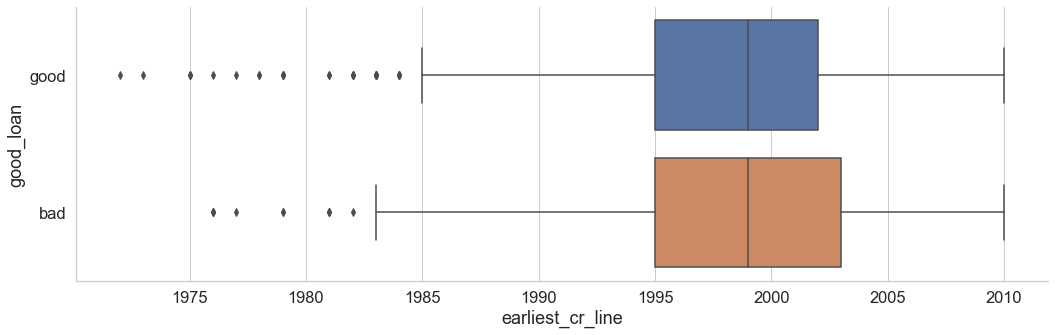

In [87]:
sns.catplot(kind = 'box', 
            y = 'good_loan', 
            x = 'earliest_cr_line', 
            data = train, 
            aspect = 3)

# Preprocessing

In [88]:
train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,purpose,addr_state,...,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,good_loan
7539,16000,16000,60 months,15.61,385.79,6 years,MORTGAGE,70000.0,major_purchase,PA,...,1994,NaN,27.0,13905.0,34.0,0.00,16414.18,16000.00,414.18,good
6399,17000,17000,36 months,11.55,561.00,10+ years,MORTGAGE,92000.0,debt_consolidation,TX,...,2005,23.0,9.0,21485.0,19.0,0.00,17165.95,17000.00,165.95,good
2987,19200,19200,60 months,9.71,405.21,< 1 year,MORTGAGE,55000.0,debt_consolidation,TX,...,1998,39.0,12.0,18998.0,31.0,17934.88,2018.85,1265.12,753.73,bad
266,16000,16000,36 months,10.74,521.86,< 1 year,RENT,65000.0,debt_consolidation,NY,...,1997,NaN,16.0,31372.0,31.0,0.00,4689.09,3526.77,1162.32,bad
5576,18000,18000,36 months,12.12,598.89,6 years,MORTGAGE,67000.0,debt_consolidation,VA,...,1994,NaN,16.0,40006.0,50.0,14997.04,4189.15,3002.96,1186.19,bad


### Feature Engineering

In [89]:
# numeric feature cross into more meaningful measurement such as percentage

train['term'] = [int(i[1:3]) for i in train['term']]
train['total_int'] = (train['installment'] * train['term']) - train['loan_amnt']
train['prncp_per'] = train['total_rec_prncp'] / train['loan_amnt']
train['int_per'] = train['total_rec_int'] / train['total_int']

In [90]:
# categorical feature cross for dimensionality reduction

# Combine delinquency column into one
train['delinq'] = np.where(train['delinq_2yrs'] ==0, 'no', 'yes')

# purpose of the loan
train['purpose'] = np.where(((train['purpose']=='debt_consolidation') | (train['purpose']=='credit_card')), 'financing', 
                            np.where(train['purpose']=='small_business', 'business', 'consumption'))

train['term'] = np.where(train['term']==36, 'short', 'long')

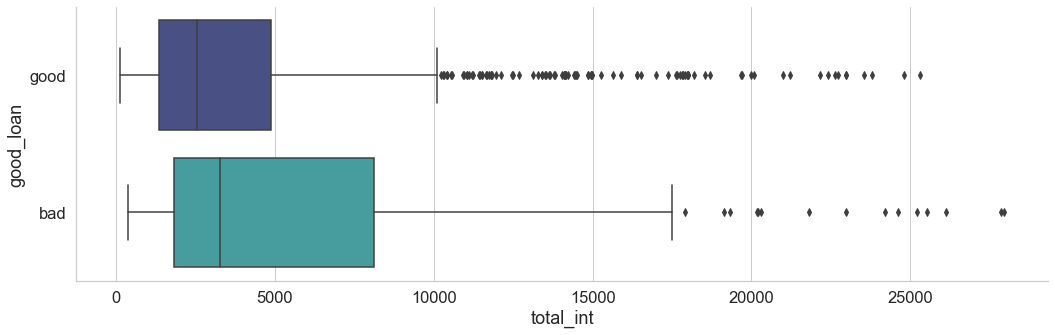

In [91]:
sns.catplot(kind = 'box', 
            y = 'good_loan', 
            x = 'total_int', 
            data = train, 
            aspect = 3, palette = 'mako')

### Feature selection 

In [92]:
y_train = train['good_loan'].reset_index(drop=True)
y_train = LabelEncoder().fit_transform(y_train)

x_train = train.drop(['loan_amnt',
                      'mths_since_last_delinq',
                      'delinq_2yrs',
                      'earliest_cr_line', 
                      'total_rec_prncp',
                      'total_rec_int', 
                      'addr_state', 
                      'good_loan', 
                      'installment', 
                      'emp_length', 
                      'open_acc', 'total_pymnt','out_prncp','prncp_per','int_per'], axis = 1).reset_index(drop=True)

In [93]:
x_train.columns

Index(['funded_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
       'purpose', 'dti', 'revol_bal', 'total_acc', 'total_int', 'delinq'],
      dtype='object')

In [94]:
numeric_col = x_train.select_dtypes(exclude=["object","category"]).columns
cate_col = x_train.select_dtypes(exclude=["int64","float64"]).columns

x_train_num = x_train[numeric_col]
x_train_cate = x_train[cate_col]

In [95]:
# Using Chi-square/F-test method to select features since all of them are non-negative value
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
selector.fit(x_train_num, y_train)
cols = selector.get_support(indices=True)

x_train_num = x_train_num.iloc[:,cols]
names = x_train_num.columns


In [96]:
names

Index(['funded_amnt', 'int_rate', 'annual_inc', 'dti', 'total_int'], dtype='object')

### Normalization and Encoding

In [97]:
# numeric scaling
x_train_num = StandardScaler().fit_transform(x_train_num)
x_train_num = pd.DataFrame(x_train_num, columns = names)

# Categorical variabl - one hot encoding
for col in x_train_cate.columns:
    coder = OneHotEncoder()
    transed = coder.fit_transform(x_train_cate[col].values.reshape(-1,1)).toarray()
    matrix = pd.DataFrame(transed, columns = coder.categories_)
    x_train_cate = pd.concat([x_train_cate.reset_index(drop=True),matrix.reset_index(drop=True)], axis = 1)

x_train_cate = x_train_cate.drop(cate_col, axis = 1)

x_train_final = pd.concat([x_train_num, x_train_cate], axis = 1)

In [98]:
x_train_final.head()

,funded_amnt,int_rate,annual_inc,dti,total_int,"(long,)","(short,)","(MORTGAGE,)","(OWN,)","(RENT,)","(business,)","(consumption,)","(financing,)","(no,)","(yes,)"
0,0.281971,0.237373,-0.002483,0.268442,0.482501,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.405689,-0.644500,0.444829,-0.886067,-0.297578,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.677868,-1.044167,-0.307469,1.552216,0.080794,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.281971,-0.820440,-0.104145,0.909696,-0.378330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.529407,-0.520690,-0.063480,0.363490,-0.225709,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### preprocessing function for test set

In [99]:
def second_processing(df):
    
    # numeric feature cross into more meaningful measurement such as percentage
    df['term'] = [int(i[1:3]) for i in df['term']]
    df['total_int'] = (df['installment'] * df['term']) - df['loan_amnt']
    df['prncp_per'] = df['total_rec_prncp'] / df['loan_amnt']
    df['int_per'] = df['total_rec_int'] / df['total_int']
    
    # categorical feature cross for dimensionality reduction

    # Combine delinquency column into one
    df['delinq'] = np.where(df['delinq_2yrs'] ==0, 'no', 'yes')

    # purpose of the loan
    df['purpose'] = np.where(((df['purpose']=='debt_consolidation') | (df['purpose']=='credit_card')), 
                                'financing', 
                                np.where(df['purpose']=='small_business', 'business', 'consumption'))

    df['term'] = np.where(df['term']==36, 'short', 'long')
    
    
    # Split y and predictor
    y = df['good_loan'].reset_index(drop=True)
    y = LabelEncoder().fit_transform(y)
    x = df.drop(['loan_amnt',
                          'mths_since_last_delinq',
                          'delinq_2yrs',
                          'earliest_cr_line', 
                          'total_rec_prncp',
                          'total_rec_int', 
                          'addr_state', 
                          'good_loan', 
                          'installment', 
                          'emp_length', 
                          'open_acc','total_pymnt','out_prncp','prncp_per','int_per'], axis = 1).reset_index(drop=True)


    # select numeric and categorical column
    numeric_col = x.select_dtypes(exclude=["object","category"]).columns
    cate_col = x.select_dtypes(exclude=["int64","float64"]).columns

    # select column
    x_num = x[numeric_col]
    x_cate = x[cate_col]
    
    
    x_num = x_num.iloc[:,cols]
    names = x_num.columns

    x_num = StandardScaler().fit_transform(x_num)

    for col in x_cate.columns:
        coder = OneHotEncoder()
        transed = coder.fit_transform(x_cate[col].values.reshape(-1,1)).toarray()
        matrix = pd.DataFrame(transed, columns = coder.categories_)
        x_cate = pd.concat([x_cate.reset_index(drop=True),matrix.reset_index(drop=True)], axis = 1)

    x_cate = x_cate.drop(cate_col, axis = 1)
    x_num = pd.DataFrame(x_num, columns = names)
    x_final = pd.concat([x_num, x_cate], axis = 1)
    
    
    return x_final,y
        


In [100]:
x_test, y_test = second_processing(test)

In [101]:
x_test.head()

,funded_amnt,int_rate,annual_inc,dti,total_int,"(long,)","(short,)","(MORTGAGE,)","(OWN,)","(RENT,)","(business,)","(consumption,)","(financing,)","(no,)","(yes,)"
0,1.760004,-1.230584,0.216007,-0.468471,-0.081143,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.511188,0.274481,-0.453063,-0.128161,0.749227,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.964629,0.595125,-0.060348,0.557539,0.871445,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.797062,-0.312276,-0.307613,-0.552279,0.622126,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.465853,-0.478052,0.128737,-0.467201,-0.868223,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Modeling

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics

**1 is good loan, 0 is bad loan**

## Logistic Regression

In [103]:
logi = LogisticRegression(random_state = 2022)

In [104]:
logi.fit(x_train_final, y_train)
y_pred = logi.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.08      0.14        87
           1       0.70      0.97      0.82       194

    accuracy                           0.70       281
   macro avg       0.64      0.53      0.48       281
weighted avg       0.67      0.70      0.61       281



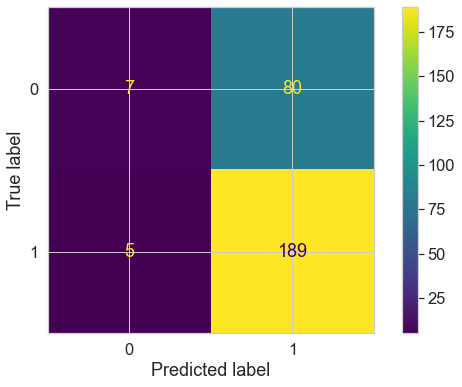

In [105]:
plot_confusion_matrix(logi, x_test, y_test)
plt.show()

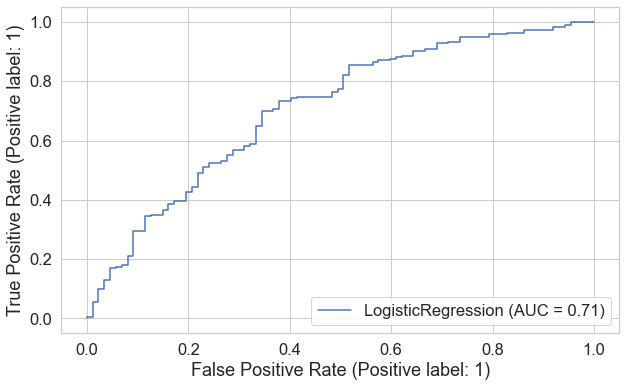

In [106]:
metrics.plot_roc_curve(logi, x_test, y_test)

In [107]:
pd.DataFrame({"variable":list(x_train_final.columns),
             "coefficient":logi.coef_.reshape(15,)})

,variable,coefficient
0,funded_amnt,-0.220214
1,int_rate,-0.369960
2,annual_inc,0.405831
3,dti,-0.360532
4,total_int,0.172940
5,"(long,)",-0.200414
6,"(short,)",0.200246
7,"(MORTGAGE,)",0.053320
8,"(OWN,)",0.059711
9,"(RENT,)",-0.113199


(0.0, 1.0)

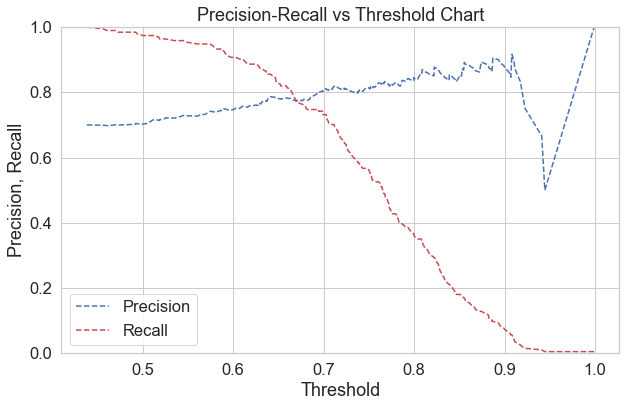

In [108]:
### Predict test_y values and probabilities based on fitted logistic 

pred_y=logi.predict(x_test) 
probs_y=logi.predict_proba(x_test) 


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:,1]) 

pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

## K nearest neighbors classifier

In [ ]:
best_score=-np.inf
N=10 
scores=np.zeros(N)

for d in range(1,N+1):
    knn = KNeighborsClassifier(n_neighbors = d)
    scores[d-1]=cross_val_score(knn,x_train_final,y_train,cv=5).mean()
    if scores[d-1]>best_score:
        best_neighbor=d
        best_score=scores[d-1]
        
best_neighbor,best_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train_final, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

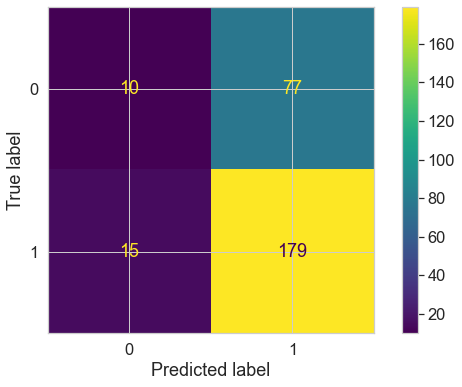

In [74]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

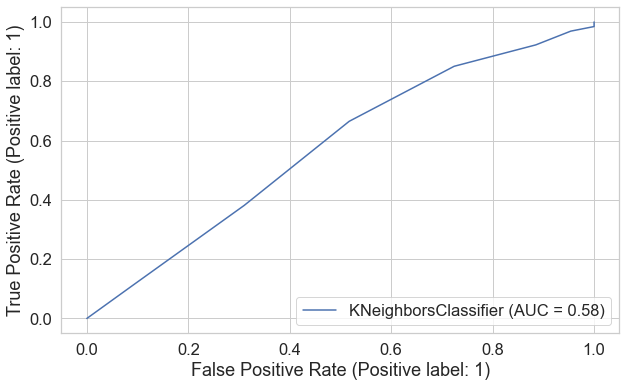

In [75]:
metrics.plot_roc_curve(knn, x_test, y_test)